In [4]:
from scipy.io import wavfile
import noisereduce as nr
import pandas as pd
import numpy as np
# load data
rate, data = wavfile.read("./original/mountain tailbord.wav")
# perform noise reduction
#data_flat=data.flatten()
#print(data_flat)

#reduced_noise = nr.reduce_noise(y=data_flat, sr=rate)
#wavfile.write("./after-reduce/mountain tailbord_reduced_noise.wav", rate, reduced_noise)

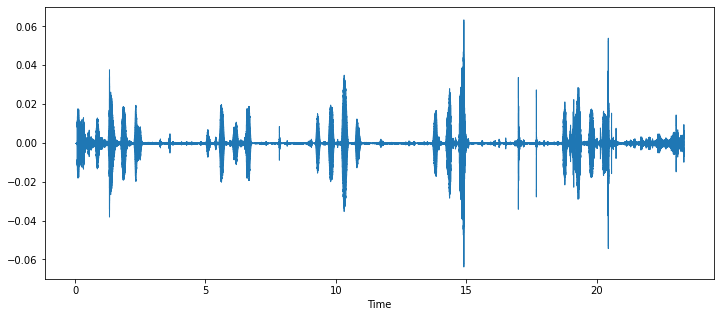

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

filepath="./after-reduce/mountain tailbord_reduced_noise.wav"

data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

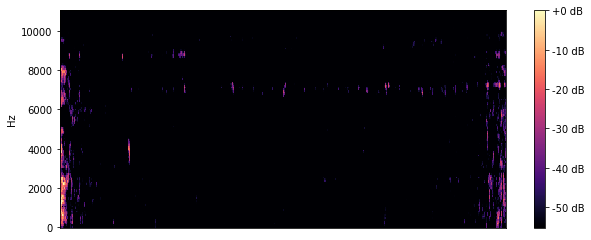

(40, 1006) [[-7.9823358e+02 -6.3822003e+02 -4.5874994e+02 ... -5.0500885e+02
  -4.8601031e+02 -4.9671039e+02]
 [ 0.0000000e+00  3.0374989e+01  6.8597870e+01 ... -3.8584757e+00
   3.1458477e+01  5.1619705e+01]
 [ 0.0000000e+00 -6.2974442e+01 -8.6860062e+01 ... -8.9397598e+01
  -7.8811615e+01 -6.7946815e+01]
 ...
 [ 0.0000000e+00  8.4399376e+00  1.5713585e+01 ... -7.0041046e+00
  -6.1643419e+00  6.2053129e-02]
 [ 0.0000000e+00  8.2452464e-01 -1.0728077e+01 ...  2.4965508e+00
   7.9390669e+00  3.9757078e+00]
 [ 0.0000000e+00  2.4173582e-01  3.5823035e+00 ... -1.1867868e+01
  -8.7024078e+00 -9.4249125e+00]]


In [5]:
import librosa.display
sound_dir="./after-reduce/mountain tailbord_reduced_noise.wav"
signal, sr = librosa.load(sound_dir) # sr = sampling rate
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
print(mfccs.shape,mfccs)